# Business Case: Aerofit 

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

# Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics **to create a customer profile** for each AeroFit treadmill product by developing appropriate tables and charts.

For each AeroFit treadmill product, construct **two-way contingency tables** and compute all **conditional and marginal probabilities** along with their insights/impact on the business.


# Analysing basic metrics 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
aerofit=pd.read_csv('aerofit.csv')
aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [8]:
aerofit.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [9]:
aerofit.shape[0] #No. of rows

180

In [10]:
aerofit.shape[1] #No. of columns

9

In [19]:
aerofit.ndim #returns the number of dimensions or axes

2

In [4]:
aerofit.info() #it shows datatype, index info., column info and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [11]:
aerofit.isnull()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False


**isnull()** method with True indicating missing values and False indicating non-missing values.

In [12]:
aerofit.isnull().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

There are no missing values in the data.

In [22]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


- **Age:** The age range for individuals in this group spans from a minimum of 18 years to a maximum of 50 years, with an average age of 28.79. Additionally, 75% of the people in this group are aged 33 or younger.

- **education:** The majority of individuals possess a 16-year education, with approximately 75% of the population having an educational attainment of 16 years or less.

- **Usage:** Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.

- **Fitness:** Average rating is 3.3 on a scale of 1 to 5.

- **Miles:** Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.

- **Income (in $):** Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K



# Non-Graphical Analysis: Value counts and unique attributes

In [113]:
aerofit['Product'].unique()  #KP281, KP481, KP781 are the 3 different products

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [114]:
aerofit['Age'].unique() # list of unique ages

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [115]:
# Number of customer againts the rating scale 1 to 5
aerofit['Fitness'].value_counts().sort_index()

1     2
2    26
3    97
4    24
5    31
Name: Fitness, dtype: int64

In [77]:
unique_MaritalStatus = aerofit['MaritalStatus'].unique()
unique_MaritalStatus

array(['Single', 'Partnered'], dtype=object)

In [119]:
# Number of customers counts on Usage
aerofit['Usage'].value_counts().sort_index()

2    33
3    69
4    52
5    17
6     7
7     2
Name: Usage, dtype: int64

In [92]:
product_counts = aerofit['Product'].value_counts()
gender_counts = aerofit['Gender'].value_counts()
marital_status_counts = aerofit['MaritalStatus'].value_counts()

In [93]:
product_counts

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [94]:
gender_counts

Male      104
Female     76
Name: Gender, dtype: int64

In [95]:
marital_status_counts

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [116]:
most_frequent_product = aerofit.groupby('Product')['Usage'].sum().reset_index()
most_frequent_product

,Product,Usage
0,KP281,247
1,KP481,184
2,KP781,191


**KP281** is the most frequent product.

In [7]:
product_gender_counts = pd.crosstab(aerofit['Product'], aerofit['Gender'], margins=True)
product_gender_counts

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


 the product-wise gender **crosstab**, showing how many females and males are associated with each product.

In [10]:
product_usage_counts = pd.crosstab(aerofit['Product'], aerofit['Usage'], margins=True)
product_usage_counts

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180


the product-wise usage **crosstab**, showing  The average number of times the customer plans to use the individual treadmill each week.

In [11]:
product_fitness_counts = pd.crosstab(aerofit['Product'], aerofit['Fitness'], margins=True)
product_fitness_counts

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


the product-wise fitness **crosstab**, showing every fitness level with each product

In [12]:
fitness_usage=round(pd.crosstab(aerofit['Fitness'],aerofit['Usage'],margins=True,normalize=True) *100,2)
fitness_usage

Usage,2,3,4,5,6,7,All
Fitness,,,,,,,
1,0.56,0.56,0.00,0.00,0.00,0.00,1.11
2,7.78,5.56,1.11,0.00,0.00,0.00,14.44
3,10.00,26.11,16.67,1.11,0.00,0.00,53.89
4,0.00,5.56,3.89,3.33,0.56,0.00,13.33
5,0.00,0.56,7.22,5.00,3.33,1.11,17.22
All,18.33,38.33,28.89,9.44,3.89,1.11,100.00


Over 53% of customers have self-rated their fitness as average (with a rating of 3), and on average, they use the product 3 to 4 times per week.

In [99]:
average_income_by_product = aerofit.groupby('Product')['Income'].mean()
average_income_by_product

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [100]:
gender_marital_cross_tab = pd.crosstab(aerofit['Gender'], aerofit['MaritalStatus'])
gender_marital_cross_tab

MaritalStatus,Partnered,Single
Gender,,
Female,46,30
Male,61,43


 relationships between two categorical variables with cross tabulation

**Summary**
- KP281, KP481, KP781 are the 3 different products
- Most commonly purchased treadmill product type is KP281
- There are 32 unique ages
- 104 Males and 76 Females are in the customers list
- 8 unique set of Educations (14, 15, 12, 13, 16, 18, 20, 21)
- Highest rated Fitness rating is 3
- Most customers usage treadmill atleast 3 days per week
- Majority of the customers who have purchased are Married/Partnered

**Conversion of Categorical attributes to 'Category'**

In [50]:
aerofit2=aerofit.copy()
aerofit2['Age_group']=aerofit.Age

aerofit2.Age_group = pd.cut(aerofit.Age, bins=[0,20,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])
age_counts=aerofit2['Age_group'].value_counts()
age_counts

Adult          142
Middle Aged     22
Teen            10
Elder            6
Name: Age_group, dtype: int64

count of number of individuals in each age group
and
Categorization of age to following categories:-
- 0-20 -> Teen
- 21-35 -> Adult
- 36-45 -> Middle Age
- 46-60 -> Elder Age

In [51]:
aerofit2['Fitness_Category']=aerofit.Fitness
aerofit2['Fitness_Category'].replace({1:'Poor shape',
                                      2:'Bad shape',
                                      3:'Average shape',
                                      4:'Good shape',
                                      5:'Excelent shape'}, inplace =True)
aerofit2.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Fitness_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Teen,Good shape
1,KP281,19,Male,15,Single,2,3,31836,75,Teen,Average shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teen,Average shape
3,KP281,19,Male,12,Single,3,3,32973,85,Teen,Average shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teen,Bad shape


Categorization of Fitness Rating to following descriptive categories

- Poor Shape
- Bad Shape
- Average Shape
- Good Shape
- Excellent Shape

# Statistical Summary

In [106]:
cross_tab = pd.crosstab(index=aerofit['Product'], columns='Count')
marginal_probability = cross_tab / cross_tab.sum() * 100
marginal_probability.columns = ['Percentage']
marginal_probability

,Percentage
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


Representing the **marginal probability**- percent of customers have purchased **KP281**, **KP481**, or **KP781** in a table

In [129]:
normalise_count = aerofit[['Product', 'Gender', 'MaritalStatus']].melt()
percentage=(normalise_count.groupby(['variable', 'value'])[['value']].count() / len(aerofit)*100).round(2)
percentage

value
variable      value           
Gender        Female     42.22
              Male       57.78
MaritalStatus Partnered  59.44
              Single     40.56
Product       KP281      44.44
              KP481      33.33
              KP781      22.22

**Product**

- **44.44%** of customers bought **KP281** product type
- **33.33%** of customers bought **KP481** product type
- **22.22%** of customers bought **KP781** product type

**Gender**
- **57.78%** of the customers are Male.

**MaritalStatus**
- **59.44%** of the customers are Partnered.

In [136]:
#Number of days used per week (listed in %)
usage=aerofit["Usage"].value_counts(normalize=True).map(lambda calc: round(100*calc, 2)).reset_index()
usage.rename(columns={'index':'DaysPerWeek'}, inplace=True)
usage

,DaysPerWeek,Usage
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


- Around **39%** of customers use **3 days per week**
- Less than **2%** of customers use **7 days per week**

In [154]:
rating = aerofit['Fitness'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
rating.rename(columns={'index':'Rating'},inplace=True)
rating

,Rating,Fitness
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11


- **Approximately 53%** of customers consider themselves to have an **average fitness level**,  
- while **14%** rate their fitness as **below average**.
- Additionally, **more than 17%** of customers have given themselves the **highest fitness ratings**.

# Visual Analysis - Univariate & Bivariate

## Univariate Analysis

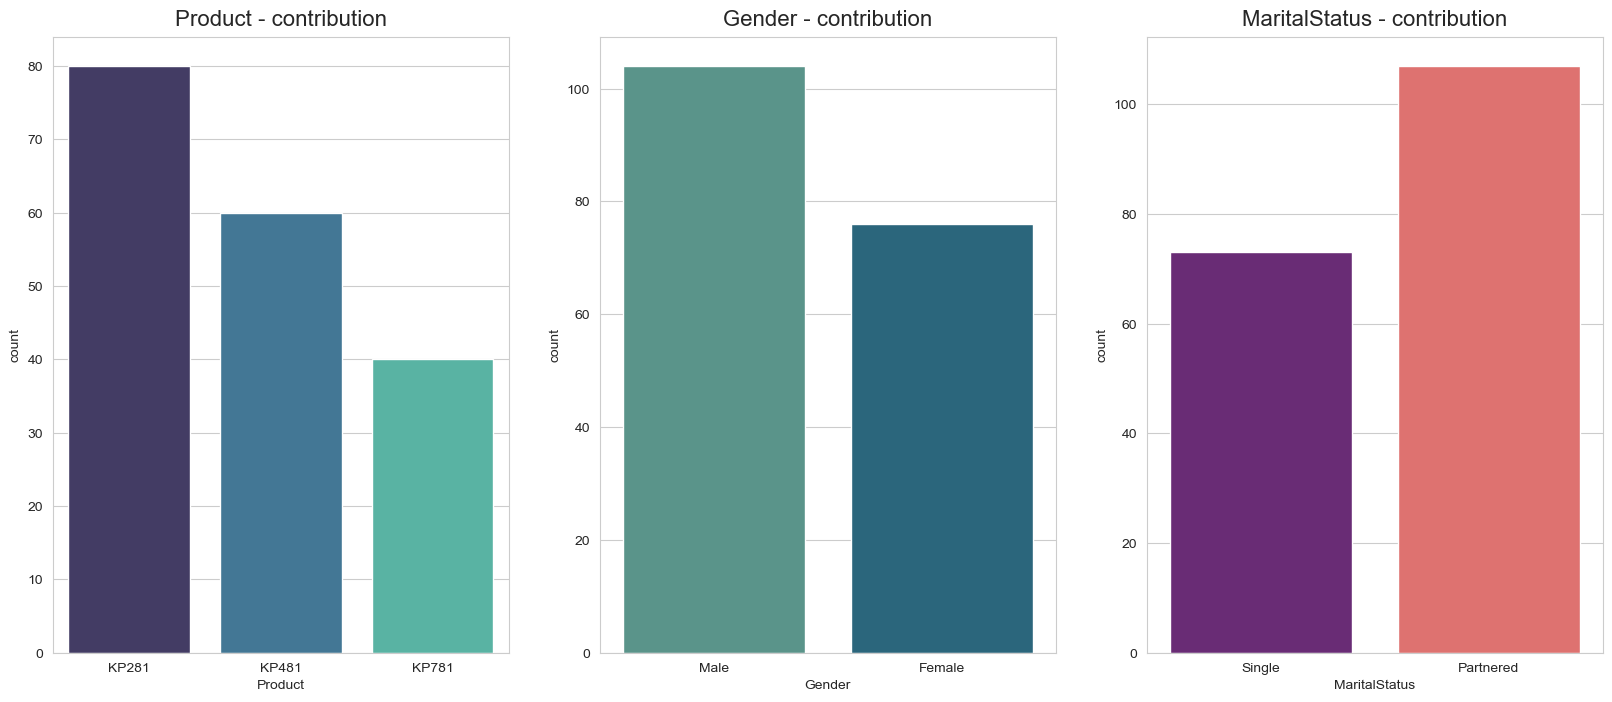

In [132]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
sns.countplot(data=aerofit, x='Product', palette="mako", ax=axs[0])
sns.countplot(data=aerofit, x='Gender', palette="crest", ax=axs[1])
sns.countplot(data=aerofit, x='MaritalStatus', palette="magma", ax=axs[2])

axs[0].set_title("Product - contribution", pad=8, fontsize=16)
axs[1].set_title("Gender - contribution", pad=8, fontsize=16)
axs[2].set_title("MaritalStatus - contribution", pad=8, fontsize=16)
plt.show()

- The product **"KP281"** stands out as the most commonly purchased item.
- There is a **higher number of males** in the dataset compared to females.
- The dataset contains a larger number of individuals who are in a **partnered or marital status**.

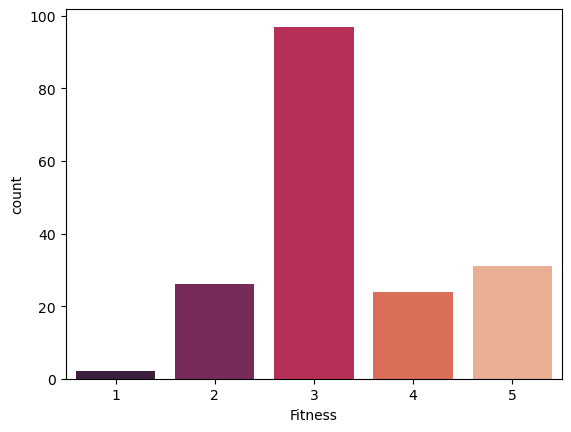

In [192]:
sns.countplot(data=aerofit,x='Fitness',palette="rocket")
plt.show()

- **More than 90 customers** have rated their physical fitness rating as **Average**
- **Excellent shape** is the second highest rating provided by the customers

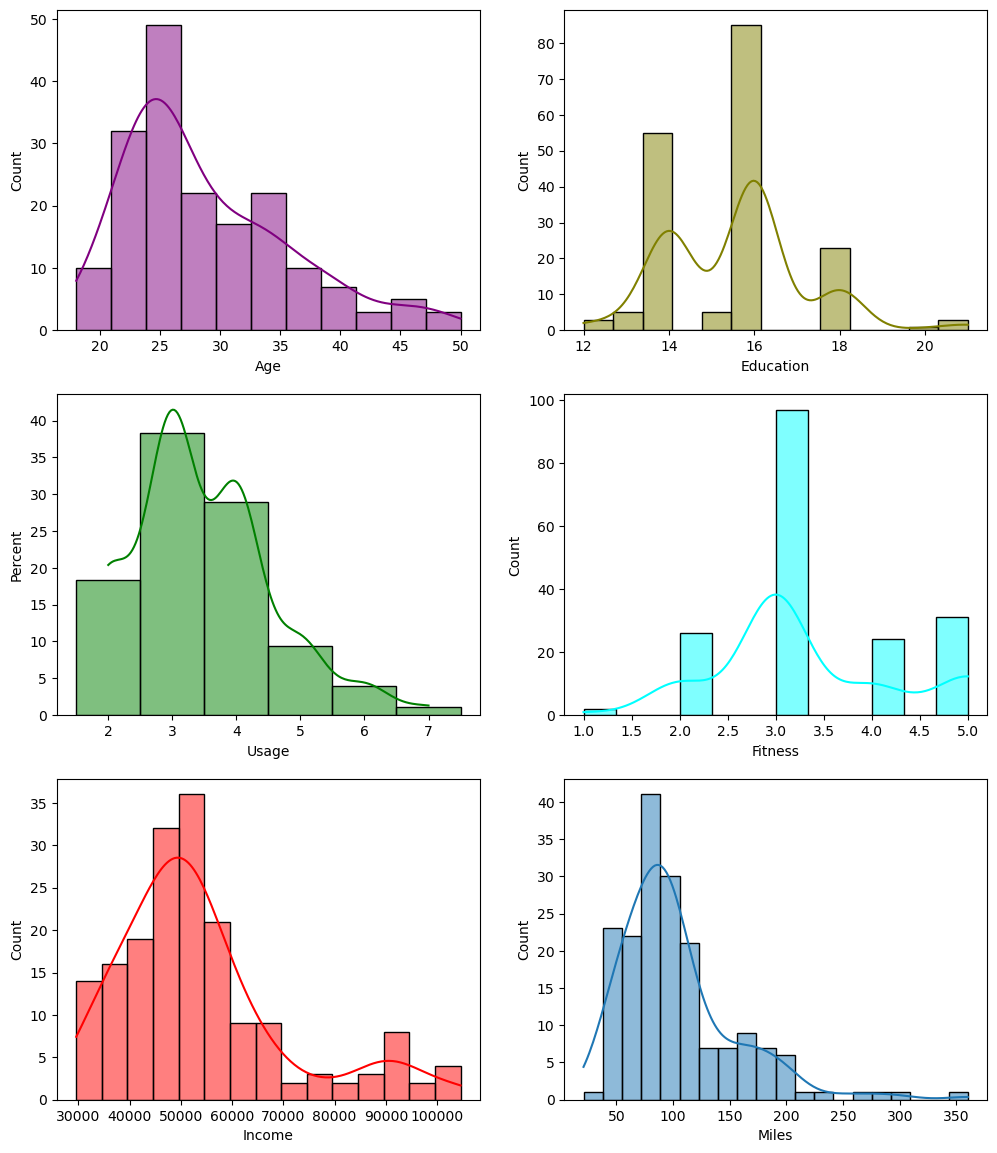

In [15]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=aerofit, x="Age",kde=True, ax=axis[0,0], color='purple')
sns.histplot(data=aerofit, x="Education", kde=True, ax=axis[0,1], color='olive')
sns.histplot(data=aerofit, x="Usage", kde=True, stat = 'percent', discrete = True, ax=axis[1,0], color='green')
sns.histplot(data=aerofit, x="Fitness", kde=True, ax=axis[1,1], color='cyan')
sns.histplot(data=aerofit, x="Income", kde=True, ax=axis[2,0], color='red')
sns.histplot(data=aerofit, x="Miles", kde=True, ax=axis[2,1])
plt.show()

- It can be evidently observed in the above plot that most customers have 16 years of Education, followed by 14 years and 18 years

- it appears that most customers use treadmills on alternate days

-  Majority of the customers earn in between 35000 and 60000 dollars annually.
- 80 % of the customers annual salary is less than 65000$.
- most customers expect to walk or run between 40 and 120 miles a week.

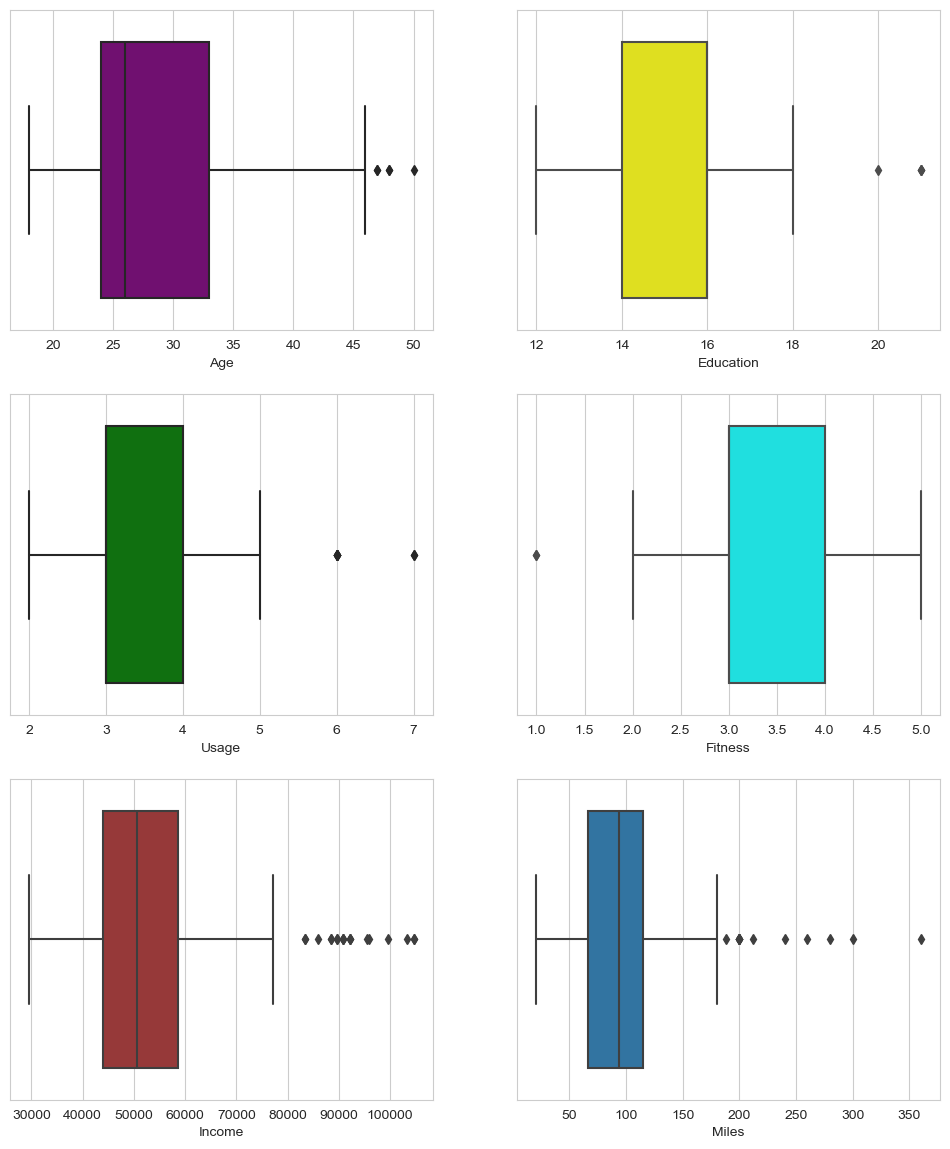

In [136]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=aerofit, x="Age", ax=axis[0,0], color='purple')
sns.boxplot(data=aerofit, x="Education", ax=axis[0,1], color='yellow')
sns.boxplot(data=aerofit, x="Usage", ax=axis[1,0], color='green')
sns.boxplot(data=aerofit, x="Fitness", ax=axis[1,1], color='cyan')
sns.boxplot(data=aerofit, x="Income",  ax=axis[2,0], color='brown')
sns.boxplot(data=aerofit, x="Miles", ax=axis[2,1])
plt.show()

- Age, Education and Usage are having very few outliers.
- While Income and Miles are having more outliers.

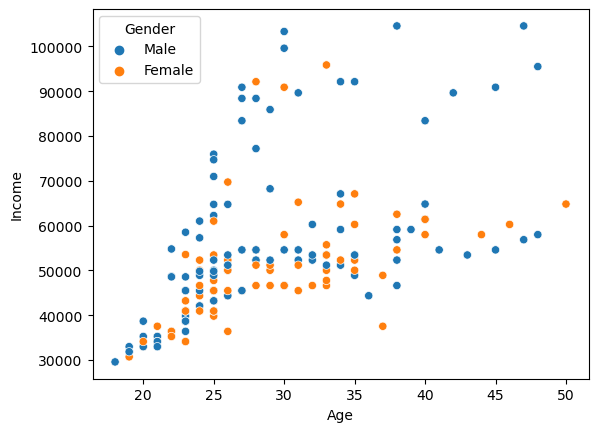

In [13]:
age_wise_income=sns.scatterplot(data=aerofit, x='Age',y='Income', hue='Gender')

## Bivariate Analysis

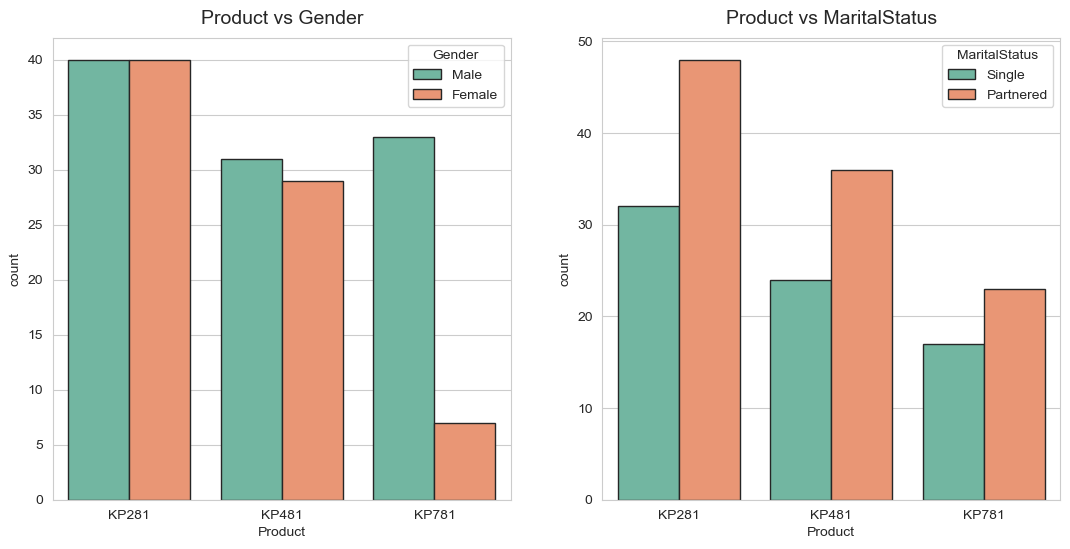

In [28]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))
sns.countplot(data=aerofit, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0])
sns.countplot(data=aerofit, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set2', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

**Product vs Gender**
- An equal number of males and females have bought the KP281 product, and a similar pattern is observed for the KP481 product.
- The majority of male customers have opted for the KP781 product.

**Product vs MaritalStatus**
- Customer who is Partnered, is more likely to purchase the product.

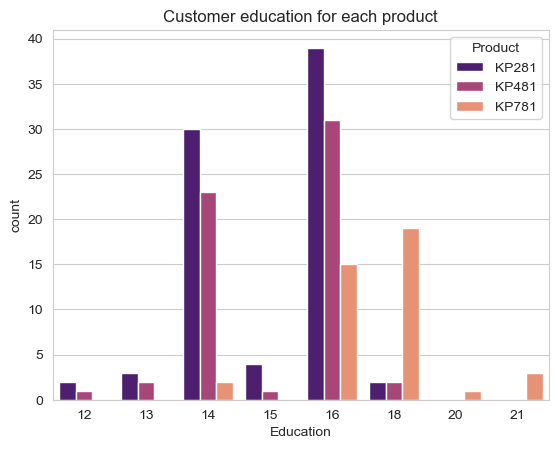

In [45]:
sns.countplot(data=aerofit, x='Education', hue='Product', palette='magma')
plt.title('Customer education for each product')
plt.show()

More than 16 years of Educated customer prefer KP781.

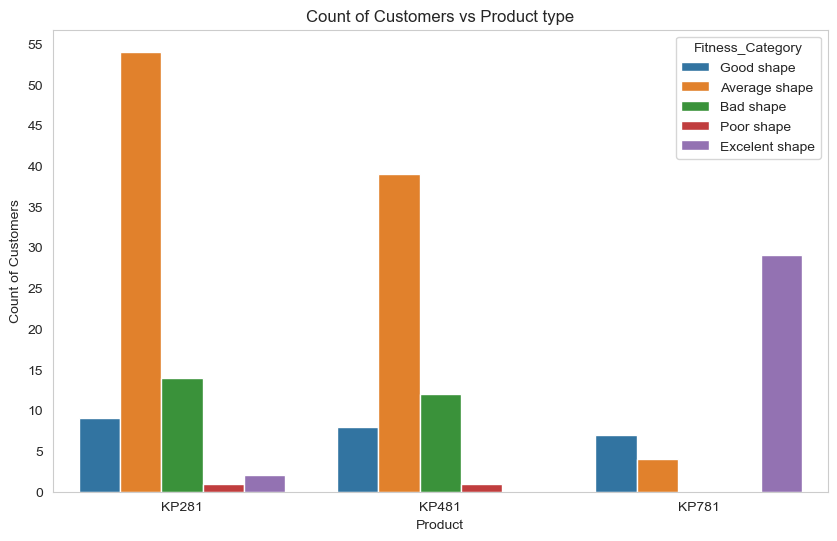

In [133]:
plt.figure(figsize = (10, 6))
plt.title("Count of Customers vs Product type")
plt.yticks(np.arange(0, 60, 5))
sns.countplot(data = aerofit2, x = 'Product', hue = 'Fitness_Category')
plt.ylabel('Count of Customers')
plt.grid(axis = 'y')
plt.show()

- The customers who rate themselses 3 out of 5 in self rated fitness scale are more likely to invest in the entry-level treadmills or treadmills for mid-level runners i.e., KP281 and KP481 respectively and they are more unlikey to buy the treadmill which has advanced features i.e., KP781.
- The treadmill having advanced features are mostly used by the people with high fitness levels.
- The customers who rate themselves 3 or below in the self-rated fitness scale do not buy KP781.

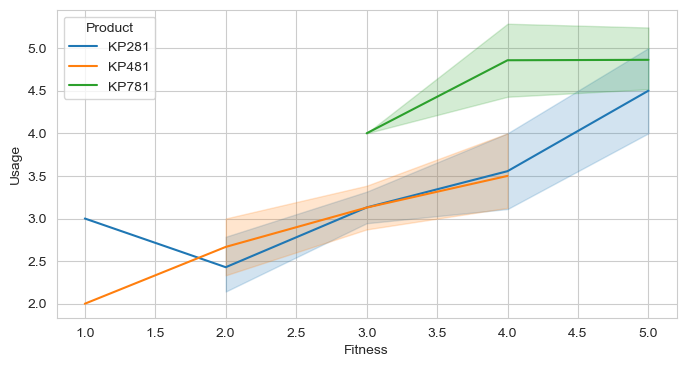

In [135]:
plt.figure(figsize = (8, 4))
sns.lineplot(data=aerofit, x='Fitness', y='Usage',hue='Product')
plt.show()

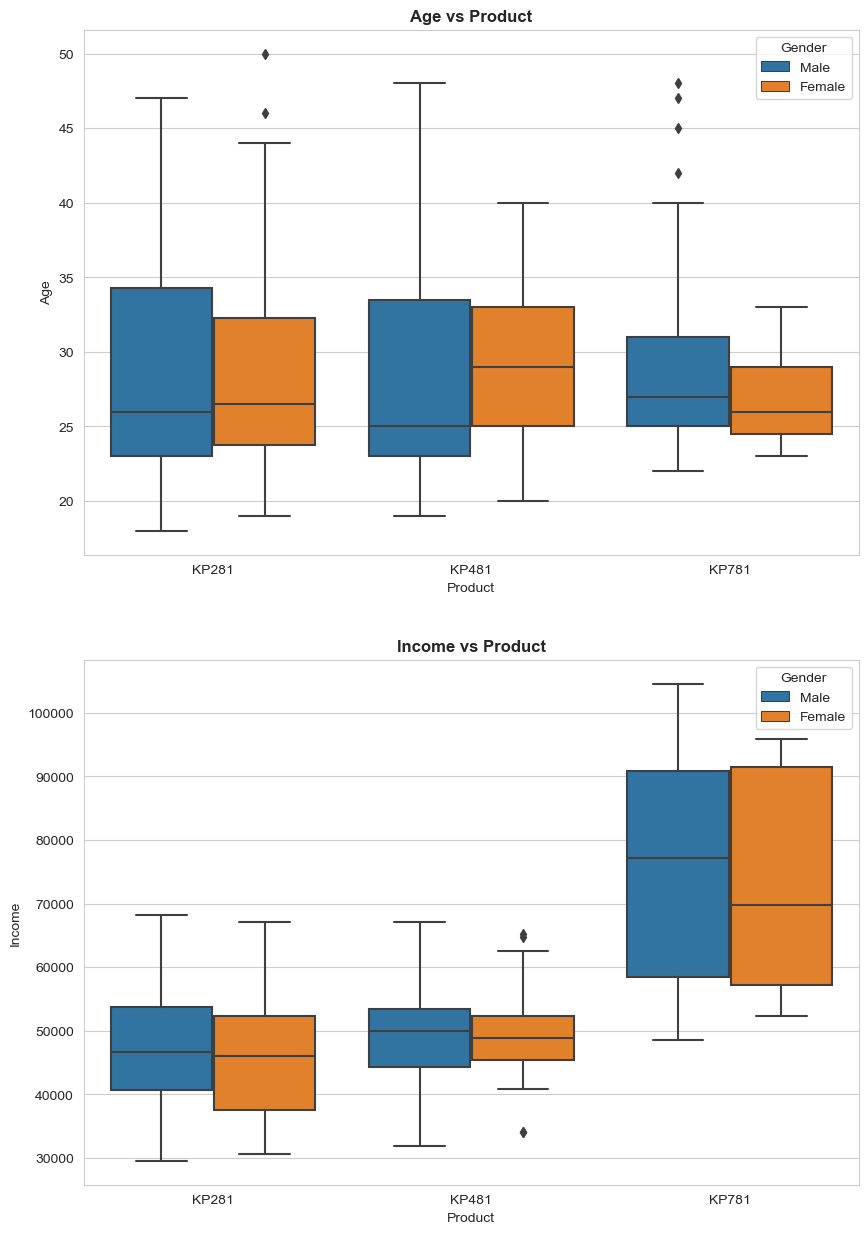

In [66]:
fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(10,15))
sns.boxplot(data=aerofit, y='Age', x='Product', hue='Gender', ax=ax[0])
ax[0].set_title('Age vs Product', fontweight='bold')
sns.boxplot(data=aerofit, y='Income', x='Product', hue='Gender', ax=ax[1])
ax[1].set_title('Income vs Product', fontweight='bold')
plt.show()

**Age vs Product**
- There is a significant difference in the median age of males and females who bought KP481.
- For any product, the age range for males is higher than that of female. The range difference is significant for the product KP781.

**Income vs Product**
- The median income of customers who bought KP781 is much higher than that of the customers who bought other two products.
- The range of income for customers buying KP781 is much higher than the same for customers buying KP281 and KP481.

## For correlation: Heatmaps, Pairplots

[]

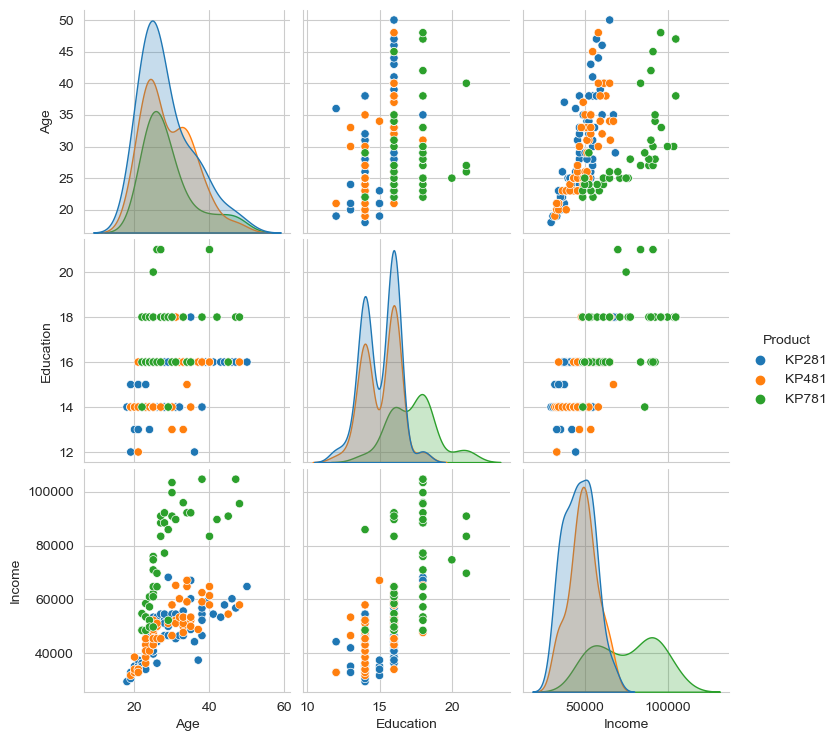

In [78]:
sns.pairplot(data = aerofit[['Product','Age','Education','Income']], hue='Product') 
plt.plot()

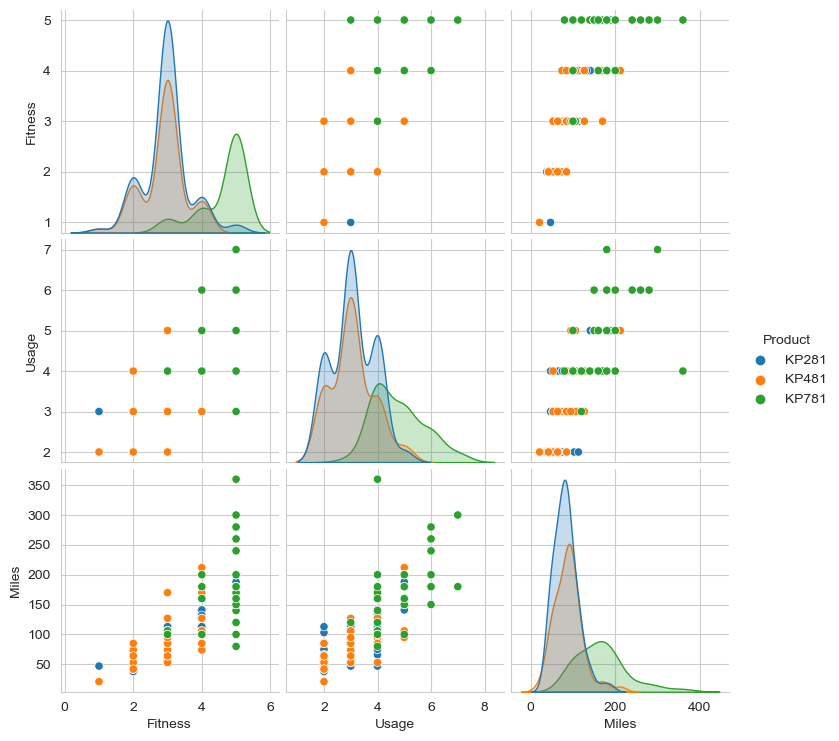

In [76]:
sns.pairplot(data=aerofit[['Fitness','Usage','Miles','Product']], hue='Product')
plt.show()

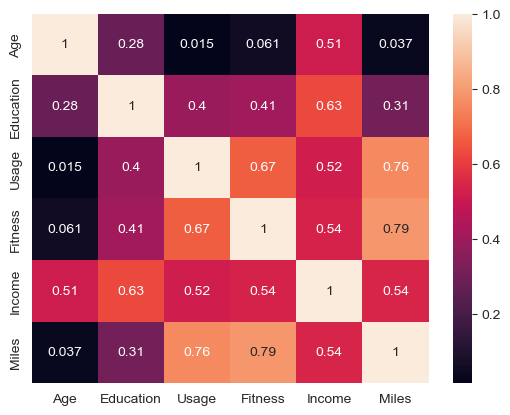

In [74]:
sns.heatmap(aerofit[['Age','Education','Usage','Fitness','Income','Miles']].corr(), annot=True)
plt.show()
           

# Missing Value & Outlier Detection 

## Missing values

In [80]:
aerofit.isnull().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

Dataset doesn't have any null values

## Outlier Detection

### Detecting outliers for Annual income

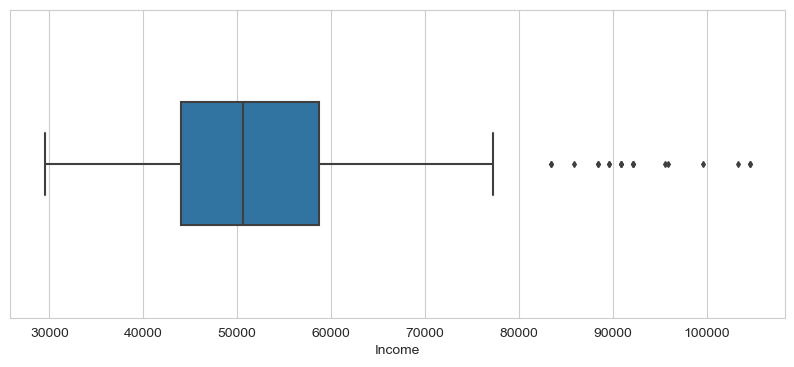

In [92]:
plt.figure(figsize = (10, 4))
sns.boxplot(data = aerofit, x = 'Income', width = 0.4, orient = 'h',  fliersize = 3)
plt.show()

In [103]:
data=aerofit['Income']
q1=data.quantile(.25)
q3=data.quantile(.75)
print("1st Quartile : ", q1)
print('Median : ', data.median())
print("3rd Quartile : ", q3)
iqr = q3 - q1
print('Innerquartile Range:', iqr)
upper = q3 + 1.5 * iqr
print('Upper bound:',upper)
lower=q1 - 1.5*iqr
print('Lower bound:',lower)
outliers=data[(data>upper)|(data<lower)]
print('outliers:', sorted(outliers))
outliers_count=len(data[(data>upper)|(data<lower)])
print('No. of outlier:', outliers_count)

1st Quartile :  44058.75
Median :  50596.5
3rd Quartile :  58668.0
Innerquartile Range: 14609.25
Upper bound: 80581.875
Lower bound: 22144.875
outliers: [83416, 83416, 85906, 88396, 88396, 89641, 89641, 90886, 90886, 90886, 92131, 92131, 92131, 95508, 95866, 99601, 103336, 104581, 104581]
No. of outlier: 19


we have exactly 19 outliers in the Income range.

### Detecting outliers for Miles

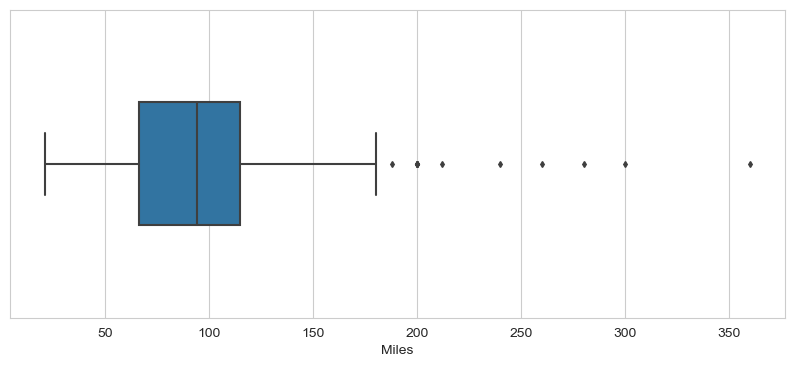

In [97]:
plt.figure(figsize = (10, 4))
sns.boxplot(data = aerofit, x = 'Miles', width = 0.4, orient = 'h',  fliersize = 3)
plt.show()

In [102]:
data1=aerofit['Miles']
q1=data1.quantile(.25)
q3=data1.quantile(.75)
print("1st Quartile : ", q1)
print('Median : ', data1.median())
print("3rd Quartile : ", q3)
iqr= q3 - q1
print('Innerquartile Range:', iqr)
upper= q3 + 1.5 * iqr
print('Upper bound:',upper)
lower= q1 - 1.5 * iqr
print('Lower bound:',lower)
outliers=data1[(data1>upper)|(data1<lower)]
print('outliers:', sorted(outliers))
outliers_count=len(data1[(data1>upper)|(data1<lower)])
print('No. of outlier:', outliers_count)

1st Quartile :  66.0
Median :  94.0
3rd Quartile :  114.75
Innerquartile Range: 48.75
Upper bound: 187.875
Lower bound: -7.125
outliers: [188, 200, 200, 200, 200, 200, 200, 212, 240, 260, 280, 300, 360]
No. of outlier: 13


- we have 13 outliers in the Miles range
- While Income and Miles are having more outliers.
- Age, Education and Usage are having very few outliers.

### detecting outliers in the age of males who bought KP781

In [101]:
#as we can see some outliers in the Age vs product boxplot, so here detecting no. of outliers

data2=aerofit.loc[(aerofit['Product']=='KP781')&(aerofit['Gender']=='Male'), 'Age']
q1=data2.quantile(.25)
q3=data2.quantile(.75)
print("1st Quartile : ", q1)
print('Median : ', data2.median())
print("3rd Quartile : ", q3)
iqr= q3 - q1
print('Innerquartile Range:', iqr)
upper= q3 + 1.5 * iqr
print('Upper bound:',upper)
lower= q1 - 1.5 * iqr
print('Lower bound:',lower)
outliers=data2[(data2>upper)|(data2<lower)]
print('outliers:', sorted(outliers))
outliers_count=len(data2[(data2>upper)|(data2<lower)])
print('No. of outlier:', outliers_count)

1st Quartile :  25.0
Median :  27.0
3rd Quartile :  31.0
Innerquartile Range: 6.0
Upper bound: 40.0
Lower bound: 16.0
outliers: [42, 45, 47, 48]
No. of outlier: 4


We have exactly 4 outliers in the data of age of the males who bought KP781 treadmill.

## Business Insights based on Non-Graphical and Visual Analysis

### Marginal Probabilities

In [126]:
np.round(((pd.crosstab(aerofit.Product, aerofit.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


- P(Male): 57.77 %
- P(Female) : 42.22 %
- 44.44% of customers bought KP281 product.
- 33.33% of customers bought KP481 product.
- 22.22% of customers bought KP781 product

### Conditional Probabilities


 **Probability of customer purchasing particular product, when customer belongs to a specific gender.**

In [119]:
products= aerofit['Product'].unique()
genders= aerofit['Gender'].unique()
for i in products:
    for j in genders:
        prob=len(aerofit[(aerofit["Product"]==i) & (aerofit['Gender']==j)])/ len(aerofit[aerofit['Gender']==j])
        prob=np.round(prob*100, 2)
        print('P({}/{}): {}%'.format(i, j, prob))
        print()     

P(KP281/Male): 38.46%

P(KP281/Female): 52.63%

P(KP481/Male): 29.81%

P(KP481/Female): 38.16%

P(KP781/Male): 31.73%

P(KP781/Female): 9.21%



 **The probability of a customer being of a specific gender, when they have purchased a particular product.**

In [124]:
for i in products:
    for j in genders:
        prob=len(aerofit[(aerofit["Product"]==i) & (aerofit['Gender']==j)])/ len(aerofit[aerofit['Product']==i])
        prob=np.round(prob*100, 2)
        print('P({}/{}): {}%'.format(j, i, prob))
        print()    

P(Male/KP281): 50.0%

P(Female/KP281): 50.0%

P(Male/KP481): 51.67%

P(Female/KP481): 48.33%

P(Male/KP781): 82.5%

P(Female/KP781): 17.5%



**Probability of customer purchasing particular product, when customer belongs to a specific MaritalStatus.**

In [125]:
products= aerofit['Product'].unique()
status= aerofit['MaritalStatus'].unique()
for i in products:
    for j in status:
        prob=len(aerofit[(aerofit["Product"]==i) & (aerofit['MaritalStatus']==j)])/ len(aerofit[aerofit['MaritalStatus']==j])
        prob=np.round(prob*100, 2)
        print('P({}/{}): {}%'.format(i, j, prob))
        print() 

P(KP281/Single): 43.84%

P(KP281/Partnered): 44.86%

P(KP481/Single): 32.88%

P(KP481/Partnered): 33.64%

P(KP781/Single): 23.29%

P(KP781/Partnered): 21.5%



## Customer Profiling - Categorization of users.

### KP281 customer's profile
- The customers who rate themselses 3 out of 5 in self rated fitness scale are more likely to invest in.
- Usage under 4days per week.
- Most of the customer who have purchased the product have rated Average shape as the fitness rating
- Income range between 39K to 53K have preferred this product.
- The customers having low fitness scale or low annual income.
- Probability increased from 44.44% to 58.7%, if customer is Female and Partnered.
- Younger to Elder beginner level customers prefer this product.
- Customers who educated under 16 years most preferable.
- Customers whose usage under 120 miles per week

### KP481 customer's profile
- This is an Intermediate level Product.
- Usage under 4days per week.
- Fitness Level of this product users varies from Bad to Average Shape depending on their usage.
- Average distance covered in this product is from 70 to 130 miles per week.
- Customers Prefer this product mostly to cover more miles than fitness.
- Less to medium earning customers. 
- Average Income of the customer who buys KP481 is 49K.
- Male customers who partnered prefer more than Male customers who single.
- It has almost similar customer's profile like KP281, but KP281 is wide range of customers than KP481.

### KP781 customer's profile
-  82.5% of them are males rest are females.
- Among all female customers, only 9.21 % buy KP781
- Customer walk/run average 120 to 200 or more miles per week 
- 90 % of them had fitness scales 4 or 5. Only 10 % of them had average body shape.
- Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.
- Usage more than 4 days per week.
- Customers who educated more than 16 years.
- the customer has the annual income in range '> 80k' is 100.0%
- This product is preferred by the customer where the correlation between Education and Income is High.

## Insights
- Product KP281 brings in the highest revenue, KP481 and KP781 come next in line respectively
- Highly educated customers prefer product KP781; they could be more aware of the product's typical features and its usage
- product KP781 is used more compared to others products KP281 and KP481
- Majority of the customers are in the age group of 22-33 years
- ~60-40% distribution of the male and female product buyers
- Majority of the buyers spend 14, 16, 18 years on their education
- ~60-40% distribution of the single and partnered product buyers
- Most of the users use the treadmill 3-4 times a week
- Among all the customers who bought KP281, 96.25 % of them had fitness scales of 2, 3 or 4. Only 2.5 % of them had excellent  body shape, Most of the users rate themselves average in terms of their fitness levels.
- Majority of the users earn between 35000 to  60000 annually
- Majority of the users set target miles expected to be walked/ran between 53 and 132 miles


# Recommendations

-  A better, high-end, premium product for highly-educated, high income and active customers to increase revenue.
- Because KP781, a premium product, is favored by males who are high earners and use it more frequently, we can target this demographic with similar products and also introduce them to upcoming premium offerings.
- Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more
- As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes. KP781 product should be promotted using influencers and other international atheletes.
- Since KP281 and KP481 also brings in significant revenue and is prefered by young & learnings individuals, added features and specialized discounts could help boost sales.
- Since KP281 is the best-selling product, we can boost the promotion of KP481 products and potentially introduce a no-cost EMI option to encourage sales.
- Research required for expanding market beyond 50 years of age considering health pros and cons.
- Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.
- KP781 can be recommended for Female customers who exercises extensively along with easy usage guidance since this type is advanced.